<a href="https://colab.research.google.com/github/ogane0112/machine-learning/blob/main/Plant_Doc%E3%82%92%E7%94%A8%E3%81%84%E3%81%9F%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colabでのセットアップ
!pip install -q fastai
!pip install fastai

In [ ]:
# PlantDoc-DatasetをGitからクローン
!git clone https://github.com/pratikkayal/PlantDoc-Dataset.git

Cloning into 'PlantDoc-Dataset'...
remote: Enumerating objects: 2670, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 2670 (delta 23), reused 41 (delta 22), pack-reused 2628
Receiving objects: 100% (2670/2670), 932.92 MiB | 25.72 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (2581/2581), done.


epoch,train_loss,valid_loss,accuracy,time
0,4.246925,2.301964,0.346899,15:30
1,2.996740,1.693694,0.492248,14:45


epoch,train_loss,valid_loss,accuracy,time
0,4.246925,2.301964,0.346899,15:30
1,2.996740,1.693694,0.492248,14:45
2,2.313687,1.559399,0.529070,14:20
3,1.926606,1.533843,0.538760,14:10


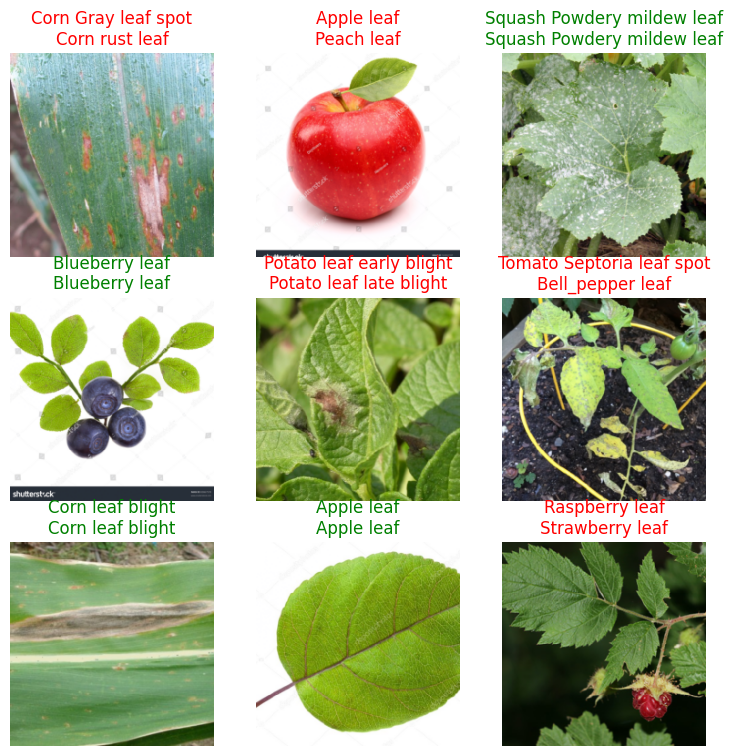

In [ ]:
from fastai.vision.all import *
from sklearn.model_selection import KFold

# データのパスを設定
path = Path('PlantDoc-Dataset')

# KFoldクロスバリデーションの設定
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# 画像のリストを取得
all_image_paths = get_image_files(path)

# 各フォールドでの学習と評価を繰り返す
#for fold, (train_idx, valid_idx) in enumerate(kf.split(all_image_paths)):
#    print(f"Fold {fold + 1}/{n_folds}")
# データをロード
datablock = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=IndexSplitter(valid_idx),
        get_y=parent_label,
        item_tfms=Resize(460),
        batch_tfms=aug_transforms(size=224)
    )
dls = datablock.dataloaders(path)

    # モデルを作成
learn = cnn_learner(dls, resnet34, metrics=accuracy)

    # モデルを学習
learn.fit_one_cycle(4)

    # 学習結果を表示
learn.show_results()


In [ ]:
from fastai.vision.all import *
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# データのパスを設定
path = Path('PlantDoc-Dataset')

# 画像のリストを取得
all_image_paths = get_image_files(path)

# データをロード
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # ランダムにトレーニングセットとテストセットに分割
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)
dls = datablock.dataloaders(path)

# データを準備
X_train, y_train = dls.train.one_batch()
X_test, y_test = dls.valid.one_batch()

# SVMモデルを作成
svm_model = SVC(kernel="linear")  # カーネルは適宜調整
svm_model.fit(X_train.view(X_train.shape[0], -1), y_train)
y_pred_svm = svm_model.predict(X_test.view(X_test.shape[0], -1))
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.03125


In [ ]:
from fastai.vision.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# データのパスを設定
path = Path('PlantDoc-Dataset')

# 画像のリストを取得
all_image_paths = get_image_files(path)

# データをロード
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # ランダムにトレーニングセットとテストセットに分割
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)
dls = datablock.dataloaders(path)

# データを準備
X_train, y_train = dls.train.one_batch()
X_test, y_test = dls.valid.one_batch()






# ランダムフォレストモデルを作成
rf_model = RandomForestClassifier(
    n_estimators=1000,  # 決定木の数
    max_depth=30,       # 決定木の最大深さを設定（例: 10）
    min_samples_split=2,  # ノードを分割する最小サンプル数を設定（例: 2）
    min_samples_leaf=1,   # 葉ノードに必要な最小サンプル数を設定（例: 1）
    random_state=42      # 乱数のシードを設定
)
rf_model.fit(X_train.view(X_train.shape[0], -1), y_train)

# モデルを使用してテストセットを評価
y_pred_rf = rf_model.predict(X_test.view(X_test.shape[0], -1))
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.046875


<ipython-input-11-130b70e72821>:72: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


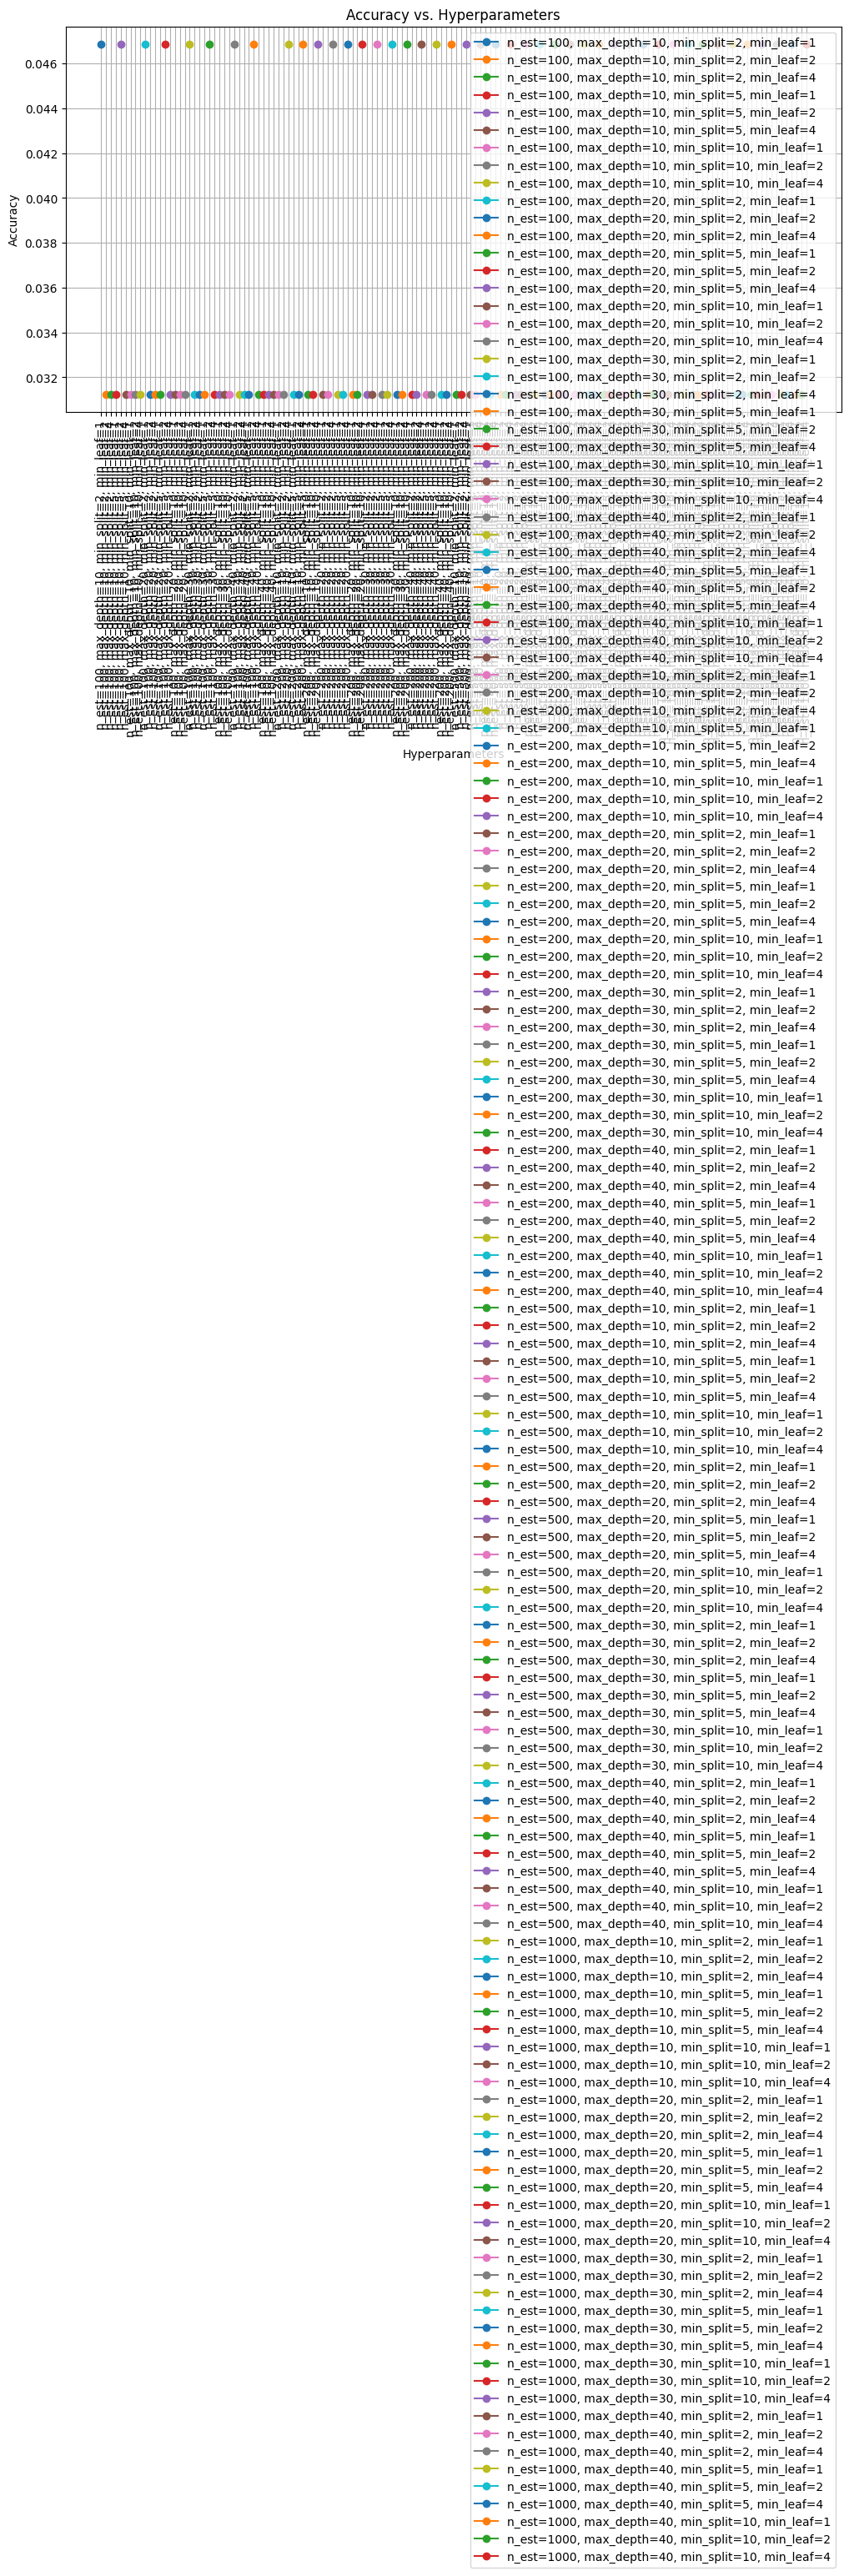

In [ ]:
from fastai.vision.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# データのパスを設定
path = Path('PlantDoc-Dataset')

# 画像のリストを取得
all_image_paths = get_image_files(path)

# データをロード
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # ランダムにトレーニングセットとテストセットに分割
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)
dls = datablock.dataloaders(path)

# データを準備
X_train, y_train = dls.train.one_batch()
X_test, y_test = dls.valid.one_batch()

# ハイパーパラメータのリストを作成
n_estimators_list = [100, 200, 500, 1000]
max_depth_list = [10, 20, 30, 40]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]

# ハイパーパラメータごとのAccuracyを保存するリストを初期化
accuracy_results = []

# 各ハイパーパラメータの組み合わせでループ
#このネストが深すぎる！すべての組み合わせを行うのでかなり時間がかかる！
#4*4*3*3 =144の場合を行うのでケースが多すぎる
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                # ランダムフォレストモデルを作成
                rf_model = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                rf_model.fit(X_train.view(X_train.shape[0], -1), y_train)

                # モデルを使用してテストセットを評価
                y_pred_rf = rf_model.predict(X_test.view(X_test.shape[0], -1))
                accuracy_rf = accuracy_score(y_test, y_pred_rf)

                # 結果をリストに追加
                accuracy_results.append((n_estimators, max_depth, min_samples_split, min_samples_leaf, accuracy_rf))

# 結果をプロット
plt.figure(figsize=(12, 6))
plt.title("Accuracy vs. Hyperparameters")
plt.xlabel("Hyperparameters")
plt.ylabel("Accuracy")
plt.grid(True)

# 各ハイパーパラメータ設定ごとにAccuracyをプロット
for n_estimators, max_depth, min_samples_split, min_samples_leaf, accuracy_rf in accuracy_results:
    label = f"n_est={n_estimators}, max_depth={max_depth}, min_split={min_samples_split}, min_leaf={min_samples_leaf}"
    plt.plot(label, accuracy_rf, marker='o', label=label)

plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
